In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\KUMAR SANU\anaconda3\lib\site-packages\matplotlib\mpl-data\s

In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6E82-34BE

 Directory of C:\Users\KUMAR SANU\Assignment\Random forest

03-04-2021  22:16    <DIR>          .
03-04-2021  22:16    <DIR>          ..
03-04-2021  22:16    <DIR>          .ipynb_checkpoints
02-04-2021  13:43            17,023 Company_Data (1).csv
03-04-2021  22:15         1,336,681 company_RandomForest.ipynb
02-04-2021  13:43            21,837 Fraud_check (1).csv
03-04-2021  22:15                72 Fraud_RandomForest.ipynb
02-04-2021  13:43             1,378 problem statement(company data) (1).txt
02-04-2021  13:43               133 Problem_statement(Fraudcheck) (1).txt
               6 File(s)      1,377,124 bytes
               3 Dir(s)  190,171,877,376 bytes free


In [5]:
Fraud=pd.read_csv('Fraud_check (1).csv')
Fraud.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
#it will convert into number 
label_encoder = preprocessing.LabelEncoder() 
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad']) 

In [8]:
#it will convert into number 
label_encoder = preprocessing.LabelEncoder() 
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status']) 

In [9]:
#it will convert into number 
label_encoder = preprocessing.LabelEncoder() 
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban']) 

In [40]:
#Converting numerical Taxable.income into categrical 
TaxInc= pd.cut(Fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [41]:
TaxInc.head(5)

0    Good
1    Good
2    Good
3    Good
4    Good
Name: Taxable.Income, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [74]:
#Droping Taxable.Income from dataframe
FraudCheck = Fraud.drop(["Taxable.Income"],axis=1)

In [75]:
FraudCheck.head(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good


In [83]:
label_encoder = preprocessing.LabelEncoder() #it will convert into number 
FraudCheck['TaxInc']= label_encoder.fit_transform(FraudCheck['TaxInc']) 

In [84]:
FraudCheck.head(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


<AxesSubplot:>

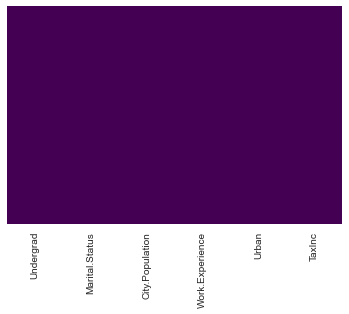

In [85]:
sns.heatmap(FraudCheck.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='TaxInc', ylabel='count'>

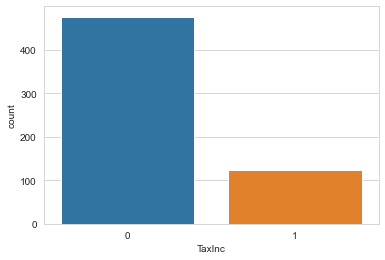

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='TaxInc',data=FraudCheck)

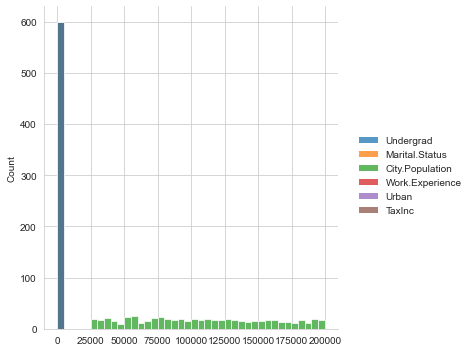

In [59]:
sns.displot(FraudCheck,kde=False,color='darkred',bins=40)

<AxesSubplot:>

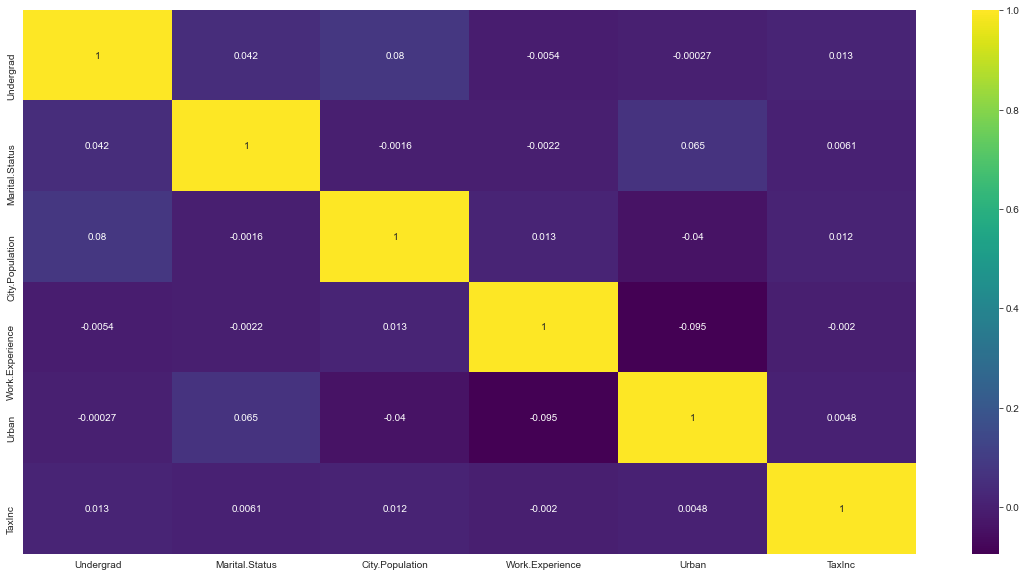

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(data=FraudCheck.corr(), annot=True, cmap='viridis')

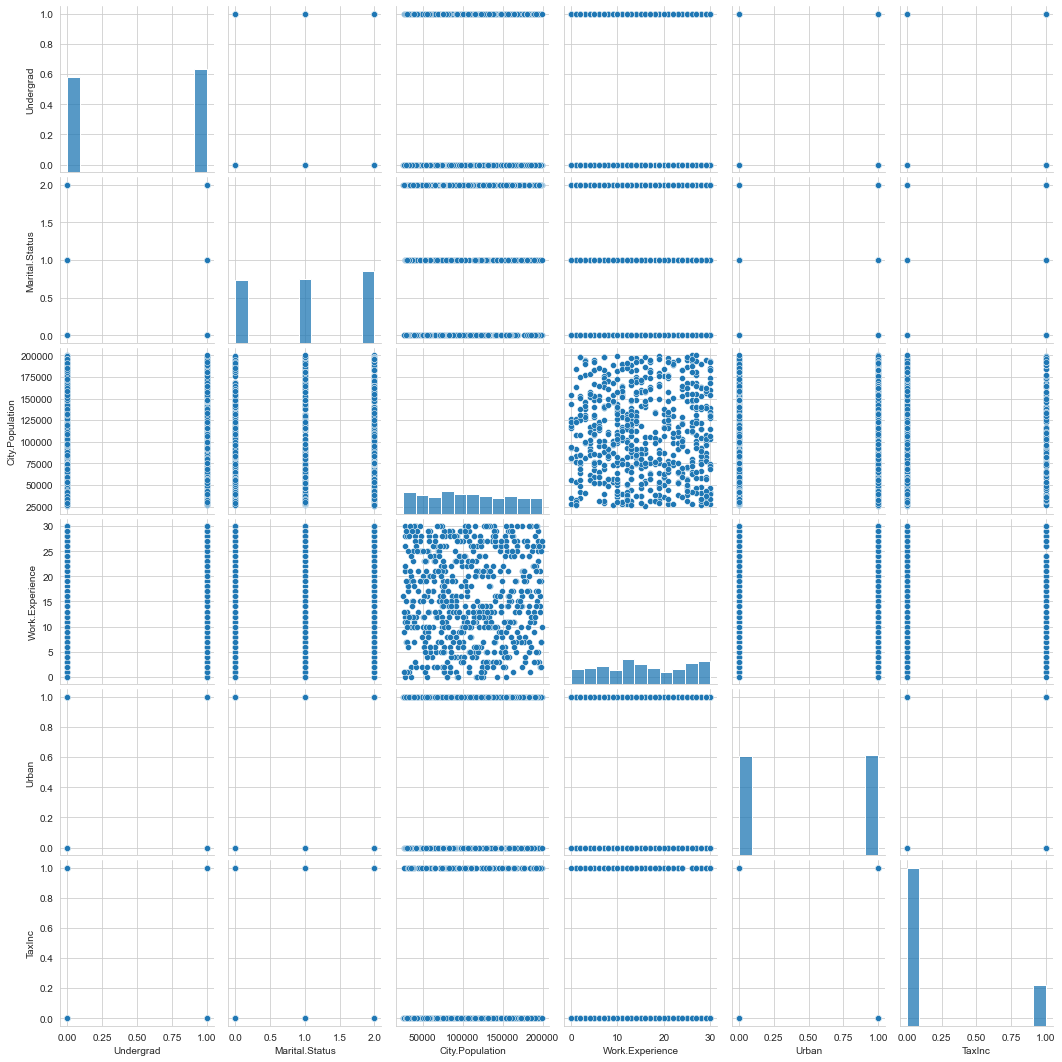

In [61]:
#pair plot
sns.pairplot(FraudCheck)

In [86]:
df=FraudCheck.drop(['TaxInc'],axis=1)
df.head(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0


In [87]:
# Normalize
df1=(df - np.min(df)) / (np.max(df) - np.min(df)).values
df1.head(5)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,1.0,0.139472,0.333333,1.0
1,1.0,0.0,0.622394,0.600000,1.0
2,0.0,0.5,0.772568,1.000000,1.0
3,1.0,1.0,0.962563,0.500000,1.0
4,0.0,0.5,0.010081,0.933333,0.0


In [96]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
array = df1.values

X = array[:,0:4]
Y = FraudCheck['TaxInc']

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=None)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())


0.7916666666666666


In [100]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

X = array[:,0:4]
Y = FraudCheck['TaxInc']
kfold = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7933333333333332
